In [1]:
import json
import numpy as np

classify_vecs = None
cluster_vecs = None
semantic_vecs = None

with open('task_classify.json', 'r') as f:
    classify_vecs = json.load(f)

with open('task_cluster.json', 'r') as f:
    cluster_vecs = json.load(f)

with open('task_semantic.json', 'r') as f:
    semantic_vecs = json.load(f)


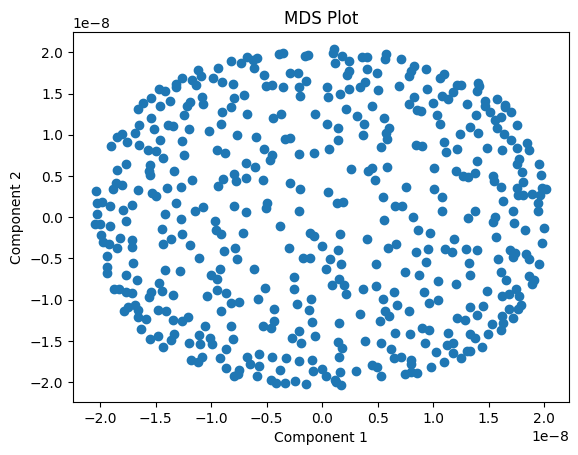

In [2]:
from sklearn.manifold import MDS

import matplotlib.pyplot as plt

task_array = np.array(classify_vecs)

mds = MDS(n_components=2)
mds_transformed = mds.fit_transform(task_array)

plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1])
plt.title('MDS Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

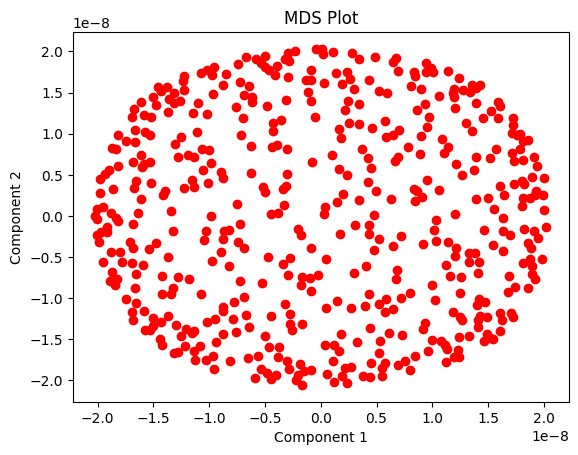

In [3]:
task_array = np.array(cluster_vecs)

mds = MDS(n_components=2)
mds_transformed = mds.fit_transform(task_array)

plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c="red")
plt.title('MDS Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

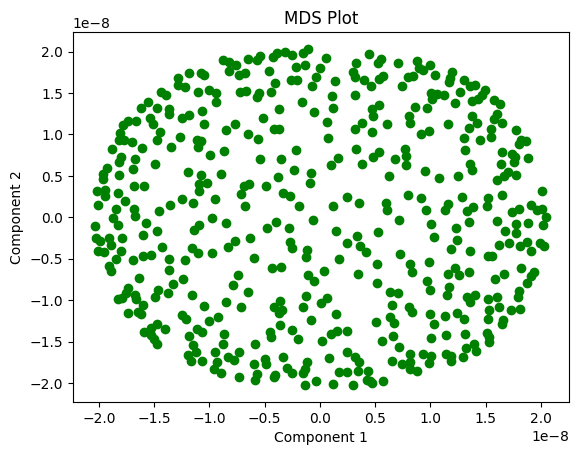

In [4]:
task_array = np.array(semantic_vecs)

mds = MDS(n_components=2)
mds_transformed = mds.fit_transform(task_array)

plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c = "green")
plt.title('MDS Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Overlaying

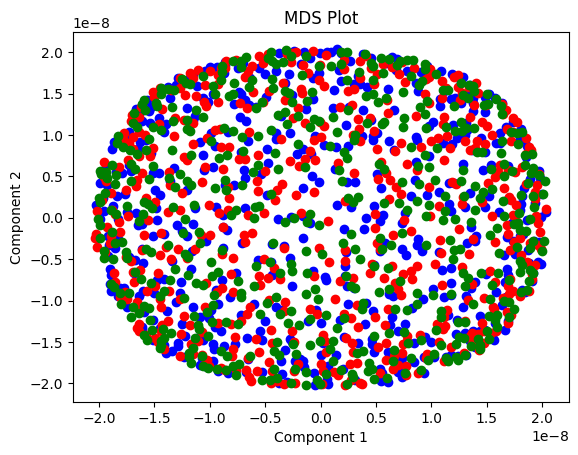

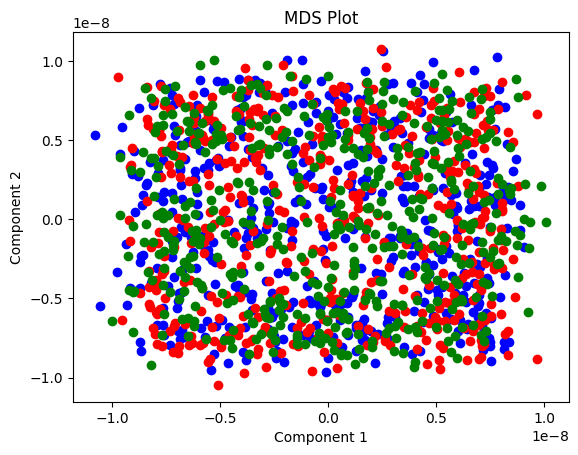

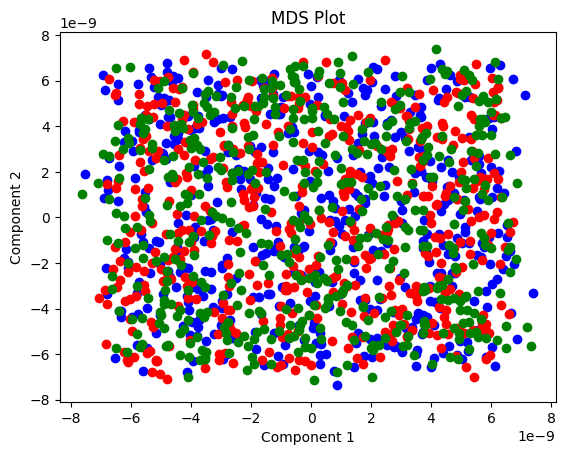

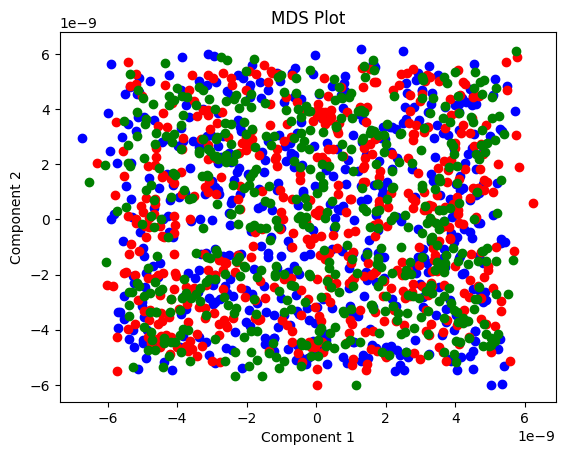

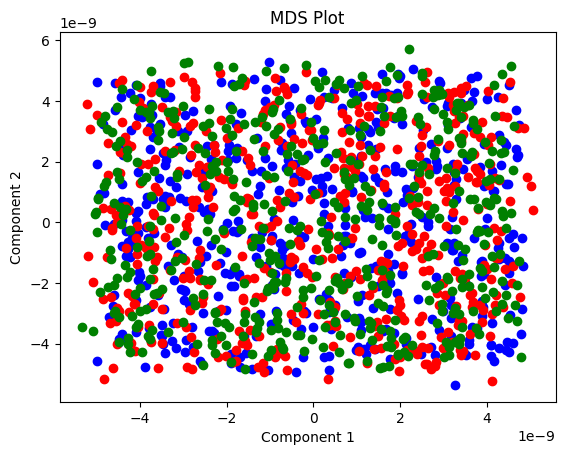

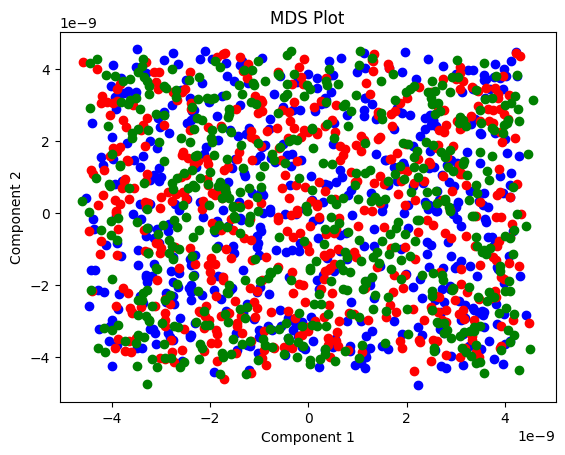

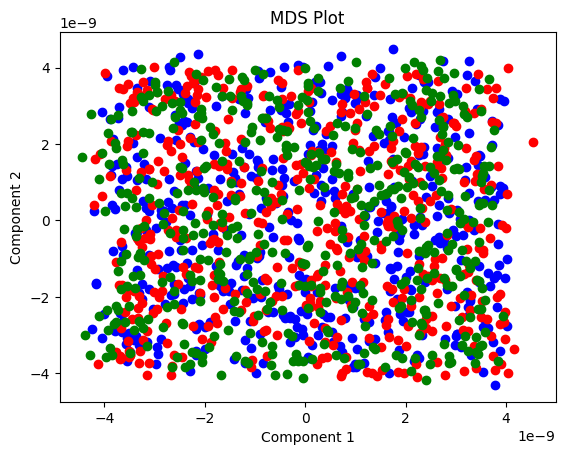

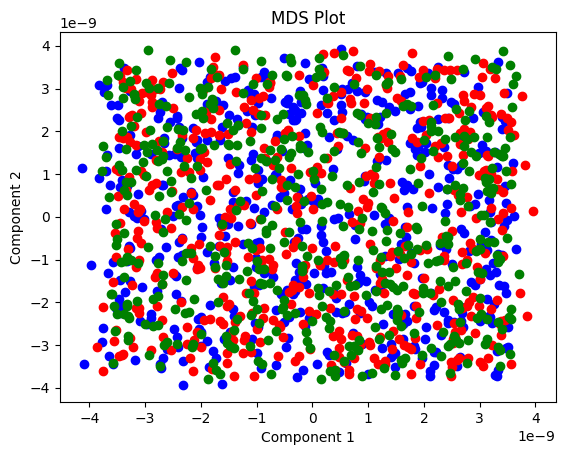

In [5]:
for i in range(2, 80, 10):
    mds = MDS(n_components=i)
    
    task_array_classify = np.array(classify_vecs)
    mds_transformed = mds.fit_transform(task_array_classify)
    plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c="blue")

    task_array_cluster = np.array(cluster_vecs)
    mds_transformed = mds.fit_transform(task_array_cluster)
    plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c="red")

    task_array_semantic = np.array(semantic_vecs)
    mds_transformed = mds.fit_transform(task_array_semantic)
    plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c="green")

    plt.title('MDS Plot')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

TSNE low dim PCA

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Nik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nik\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

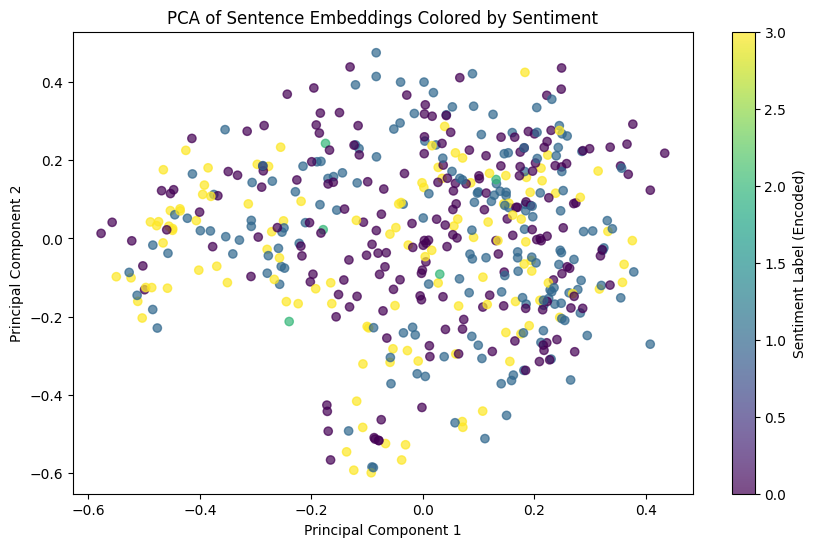

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

df = pd.read_csv('data/data.csv')

model = SentenceTransformer('all-MiniLM-L6-v2')

df['embedding'] = df['sentences'].apply(lambda x: model.encode(x))

import numpy as np
embeddings = np.vstack(df['embedding'].values)

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment_label'])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c=df['sentiment_encoded'],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(scatter, label='Sentiment Label (Encoded)')
plt.title('PCA of Sentence Embeddings Colored by Sentiment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Mutual Information between sentence length and sentiment: 0.015405321409143635


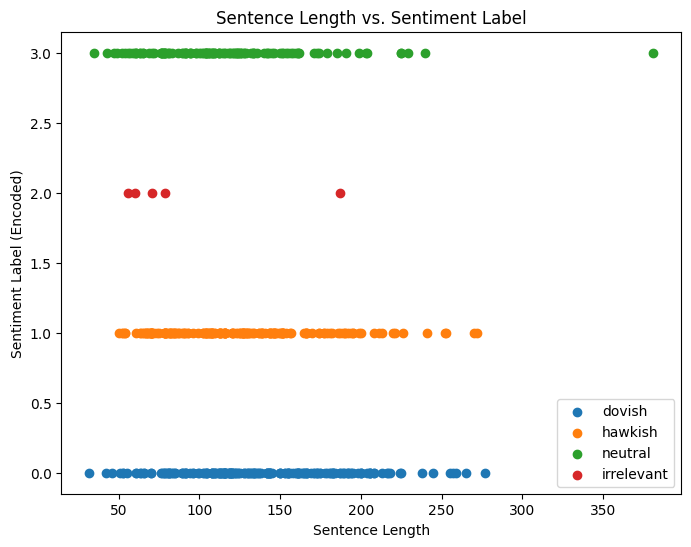

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

df = pd.read_csv('data/data.csv')

df['sentence_length'] = df['sentences'].apply(len)

label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment_label'])

X = df[['sentence_length']]
y = df['sentiment_encoded']

mi = mutual_info_classif(X, y, discrete_features=False)
print(f"Mutual Information between sentence length and sentiment: {mi[0]}")

plt.figure(figsize=(8, 6))
for sentiment in df['sentiment_label'].unique():
    plt.scatter(
        df[df['sentiment_label'] == sentiment]['sentence_length'],
        df[df['sentiment_label'] == sentiment]['sentiment_encoded'],
        label=sentiment
    )

plt.title('Sentence Length vs. Sentiment Label')
plt.xlabel('Sentence Length')
plt.ylabel('Sentiment Label (Encoded)')
plt.legend()
plt.show()